In [2]:
import ome_zarr
import zarr

In [3]:
data = zarr.open("https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/6001240.zarr")

In [4]:
%gui qt

In [5]:
import napari

In [6]:
data = zarr.open("https://s3.embassy.ebi.ac.uk/idr/zarr/v0.1/6001240.zarr")

In [7]:


arr = data[0][0]

In [8]:
arr.shape

(2, 236, 275, 271)

In [9]:
import matplotlib.pyplot as plt

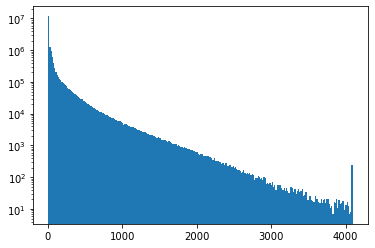

In [10]:
fig, ax = plt.subplots()

H = ax.hist(arr[0, ...].ravel(), bins=256)
ax.set_yscale('log')

In [11]:
import numpy as np

In [12]:
viewer = napari.Viewer()
viewer.add_image(arr)

<Image layer 'arr' at 0x7ff9a368c410>

In [30]:
# _, x, y, z = (np.abs(arr - 1000) < 200).nonzero()

_, x, y, z = (arr > 1200).nonzero()

In [31]:
points = np.vstack([x, y, z]).T

In [32]:
points.shape

(115008, 3)

In [33]:
from scipy.spatial import ConvexHull

In [40]:
hull = ConvexHull(points)

triangles = hull.simplices

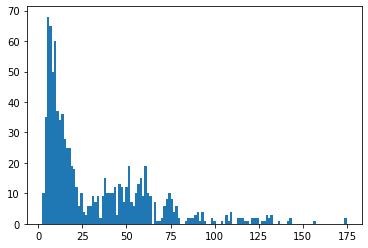

In [41]:
max_length = np.vstack(
    [
        np.linalg.norm(
            points[triangles[:, i]] - points[triangles[:, j]],
            axis=1
        )
    for i, j in ((0, 1), (0, 2), (1, 2))
    ]
).max(axis=0)


H = plt.hist(max_length, bins=128)

In [42]:
triangles = triangles[max_length < 25]

In [47]:
colors = points[:, 2]
viewer.add_surface((points, triangles, colors), colormap="viridis")

<Surface layer 'Surface' at 0x7ff998398210>